In [1]:
from header import *
from util import *
from projection_plot_nondefault import get_box, annotate_box
#from foggie.utils.get_halo_center import get_halo_center

In [2]:
def get_halo_center(ds, center_guess, radius=50):
    print('Trying to find center within', np.round(radius, decimals=3), 'physical kpc around', center_guess, '...')
    sphere = ds.sphere(center_guess, (radius, 'kpc'))

    x_pos = np.array(sphere['x'].in_units('code_length'))
    y_pos = np.array(sphere['y'].in_units('code_length'))
    z_pos = np.array(sphere['z'].in_units('code_length'))

    dm_density = sphere['Dark_Matter_Density']
    imax1 = (np.where(dm_density > 0.9999 * np.max(dm_density)))[0][0]
    imax2 = (np.where(dm_density == np.max(dm_density)))[0][0]
    print('imax1 =', imax1, 'imax2 =', imax2, 'out of', len(dm_density), 'max density =', np.max(dm_density)) #
    imax = imax1 # imax2
    halo_center = [x_pos[imax], y_pos[imax], z_pos[imax]]
    return halo_center

In [19]:
width = 200 # kpc
proj = 'x'
center_guess = [0.559921, 0.505539, 0.538803]
# [0.0367308, 0.1460984, 0.769466] is center for halo 5205 at z=2 from Anna's catalogue
# [0.5582994, 0.50688271, 0.53809345] is center guess for DD0016 (z=2.0) n7 based on Anna's catalogue and domain shifts from /nobackup/aachary2/bigbox/halo_5205/natural_7n/25Mpc_DM_256-L3-gas.conf_log.txt 
# [0.559647, 0.506729, 0.538345] is center for DD0016 (z=2.0) n7 # [0.560013, 0.505539, 0.538864] with expanded search radius
# [0.559921, 0.505539, 0.538803] is center for RD0111 (z=2.0) n7
# [0.524643, 0.503891, 0.519577] is center for DD0004 (z=6.4) n7 # [0.517624, 0.505844, 0.516647] with expanded search radius
# [0.524715, 0.503910, 0.519596] was center for DD0004 (z=6.4) n9 # [0.521725, 0.50362, 0.517071] with expanded search radius
# [0.521149, 0.504364, 0.517303] is center for DD0003 (z=7.9) n7
# [0.520554, 0.505112, 0.518295] is center for RD0010 (z=8.0) n7
# [0.521057, 0.504456, 0.519348] is center for RD0009 (z=9.0) n7
# [0.511978, 0.507278, 0.514816] was center for RD0010 (z=8.0) n7 PREVIOUSLY

In [33]:
foggie_dir = '/Volumes/Elements/foggieforayan/' # '/Users/acharyya/models/simulation_output/foggie/'
halo = '5205'
run = 'natural_7n'
output = 'RD0111'
ds = yt.load(foggie_dir + 'halo_' + halo + '/' + run + '/' + output + '/' + output)

yt : [INFO     ] 2022-04-29 16:35:45,519 Parameters: current_time              = 154.50044204663
yt : [INFO     ] 2022-04-29 16:35:45,521 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-04-29 16:35:45,523 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-29 16:35:45,524 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-04-29 16:35:45,525 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-04-29 16:35:45,526 Parameters: current_redshift          = 2.0039996408324
yt : [INFO     ] 2022-04-29 16:35:45,526 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2022-04-29 16:35:45,527 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2022-04-29 16:35:45,528 Parameters: omega_radiation           = 0
yt : [INFO     ] 2022-04-29 16:35:45,528 Parameters: hubble_constant           = 0.695


In [34]:
radius = 20 / (1 + ds.current_redshift) / ds.hubble_constant # comoving kpc to physical kpc
center = get_halo_center(ds, center_guess, radius=radius)
print('\nz =', np.round(ds.current_redshift, decimals=3), '\nsearch radius =', np.round(radius, decimals=3), 'kpc physical', '\nguess center at =', center_guess, '\nfound center at =', np.array(center).round(decimals=6).tolist())

Trying to find center within 9.58 physical kpc around [0.523041, 0.503693, 0.517365] ...


Parsing Hierarchy : 100%|██████████| 2422/2422 [00:00<00:00, 11023.66it/s]
yt : [INFO     ] 2022-04-29 16:35:48,056 Gathering a field list (this may take a moment.)


imax1 = 14 imax2 = 14 out of 20 max density = 2.172253159816277 code_mass/code_length**3

z = 2.004 
search radius = 9.58 kpc physical 
guess center at = [0.523041, 0.503693, 0.517365] 
found center at = [0.523193, 0.50415, 0.516846]


In [35]:
box = get_box(ds, proj, center, width)

Extracting box within left and right edges as [0.51484224 0.         0.        ] [0.53154448 1.         1.        ]


yt : [INFO     ] 2022-04-29 15:36:40,168 Projection completed
yt : [INFO     ] 2022-04-29 15:36:40,170 xlim = 0.497188 0.513890
yt : [INFO     ] 2022-04-29 15:36:40,170 ylim = 0.530452 0.547154
yt : [INFO     ] 2022-04-29 15:36:40,171 xlim = 0.497188 0.513890
yt : [INFO     ] 2022-04-29 15:36:40,172 ylim = 0.530452 0.547154
yt : [INFO     ] 2022-04-29 15:36:40,173 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800



search radius (red circle) = 9.58 kpc physical 
guess center at (red cross) = [0.559921, 0.505539, 0.538803] 
found center at (white cross) = [0.559921, 0.505539, 0.538803] 
50 physical kpc box (red square) 
250 comoving kpc (119.744 physical kpc) box (white square)



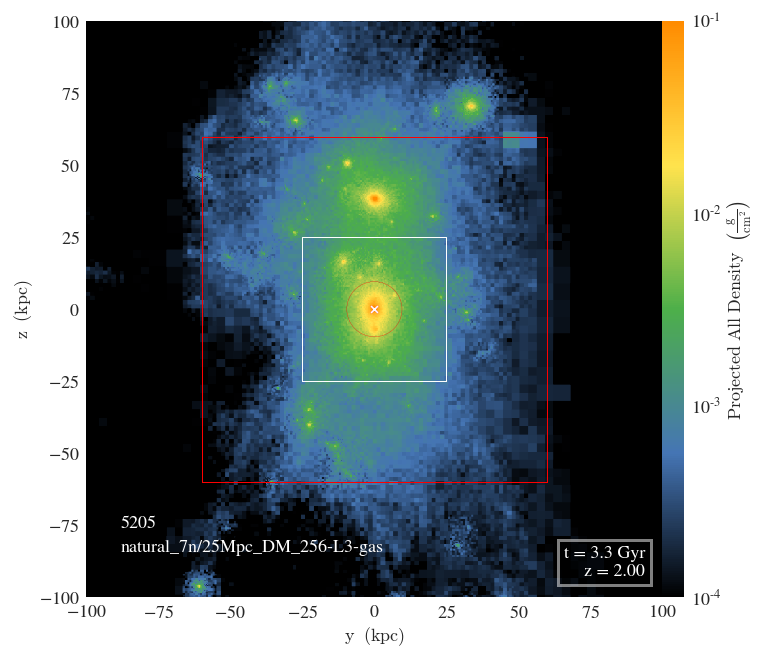

In [23]:
field = ('deposit', 'all_density') # 'density'
zlim = [1e-4, 1e-1] # [1e-5, 5e-2]
p = yt.ProjectionPlot(ds, proj, field, center=center, width=(width, 'kpc'), data_source=box)

p.annotate_text((0.06, 0.12), halo, coord_system='axis')
p.annotate_text((0.06, 0.08), run + '/25Mpc_DM_256-L3-gas', coord_system='axis')
p.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)

#p.annotate_grids(min_level=6)
p.annotate_marker(center_guess, coord_system='data', plot_args={'color':'r'})
p.annotate_sphere(center_guess, radius=(radius, 'kpc'), circle_args={'color': 'r'})
p.annotate_marker(center, coord_system='data', plot_args={'color':'w'})

p = annotate_box(p, 50, ds, unit='kpc', projection=proj, center=center, linewidth=1, color='white') # 50 physical kpc
p = annotate_box(p, 250 / (1 + ds.current_redshift) / ds.hubble_constant, ds, unit='kpc', projection=proj, center=center, linewidth=1, color='red') # 400 comoving kpc

p.set_cmap(field, density_color_map)
p.set_zlim(field, zmin=zlim[0], zmax=zlim[1])

print('\nsearch radius (red circle) =', np.round(radius, decimals=3), 'kpc physical', \
      '\nguess center at (red cross) =', center_guess, \
      '\nfound center at (white cross) =', np.array(center).round(decimals=6).tolist(), \
      '\n50 physical kpc box (red square)', \
      '\n250 comoving kpc (' + str(np.round((250 / (1 + ds.current_redshift) / ds.hubble_constant), decimals=3)) + ' physical kpc) box (white square)', \
     )
p.show()

In [36]:
ds2 = ds
halos = Table.read('/Users/acharyya/Downloads/out_0.list', format='ascii', header_start=0)
thishalo = thishalo = halos[halos['ID'] == int(halo)]
rvir = thishalo['Rvir'][0] / (1 + ds.current_redshift) / ds.hubble_constant
ds2_rvir = ds2.sphere(center, (rvir, 'kpc'))
ds2_rvir_ind = ds2_rvir['nbody', 'particle_index']
print('Rvir at z=2 =', np.round(rvir, decimals=3), 'kpc physical')

Rvir at z=2 = 36.826 kpc physical


In [45]:
foggie_dir = '/Volumes/Elements/foggieforayan/' # '/Users/acharyya/models/simulation_output/foggie/'
halo = '5205'
run = 'natural_7n'
output = 'RD0009'
ds_hz = yt.load(foggie_dir + 'halo_' + halo + '/' + run + '/' + output + '/' + output)

yt : [INFO     ] 2022-04-29 16:53:16,958 Parameters: current_time              = 25.809650404531
yt : [INFO     ] 2022-04-29 16:53:16,959 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-04-29 16:53:16,959 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-29 16:53:16,960 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-04-29 16:53:16,960 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-04-29 16:53:16,961 Parameters: current_redshift          = 8.999993722625
yt : [INFO     ] 2022-04-29 16:53:16,962 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2022-04-29 16:53:16,962 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2022-04-29 16:53:16,963 Parameters: omega_radiation           = 0
yt : [INFO     ] 2022-04-29 16:53:16,963 Parameters: hubble_constant           = 0.695


In [46]:
center_guess = [0.523041, 0.503693, 0.517365] # center for RD0009 n7
radius = 20 / (1 + ds_hz.current_redshift) / ds_hz.hubble_constant # comoving kpc to physical kpc
center = get_halo_center(ds_hz, center_guess, radius=radius)
print('\nz =', np.round(ds_hz.current_redshift, decimals=3), '\nsearch radius =', np.round(radius, decimals=3), 'kpc physical', '\nguess center at =', center_guess, '\nfound center at =', np.array(center).round(decimals=6).tolist())

Trying to find center within 2.878 physical kpc around [0.523041, 0.503693, 0.517365] ...


Parsing Hierarchy : 100%|██████████| 1973/1973 [00:00<00:00, 13394.89it/s]
yt : [INFO     ] 2022-04-29 16:53:32,796 Gathering a field list (this may take a moment.)


imax1 = 1865 imax2 = 1865 out of 2651 max density = 3053.755103893233 code_mass/code_length**3

z = 9.0 
search radius = 2.878 kpc physical 
guess center at = [0.523041, 0.503693, 0.517365] 
found center at = [0.523041, 0.503693, 0.517365]


In [47]:
ds2_rvir_mass = ds2_rvir['nbody', 'particle_mass'].in_units('Msun')
print('Mvir at z=2', np.round(ds2_rvir_mass.sum().value, decimals=3), 'Msun')
ad = ds_hz.all_data()
ds_cr = ad.cut_region(['obj["nbody", "particle_index"] == ds2_rvir_ind'])

Mvir at z=2 89375333.304 Msun


In [ ]:
ds_cr_mass = ds_cr['nbody', 'particle_mass'].in_units('Msun')
print('Mass of same particles at high-z=', np.round(ds_cr_mass.sum().value, decimals=3), 'Msun')

Extracting box within left and right edges as [0.49524079 0.         0.        ] [0.55084075 1.         1.        ]


yt : [INFO     ] 2022-04-29 16:55:00,765 Projection completed
yt : [INFO     ] 2022-04-29 16:55:00,766 xlim = 0.475893 0.531493
yt : [INFO     ] 2022-04-29 16:55:00,766 ylim = 0.489565 0.545164
yt : [INFO     ] 2022-04-29 16:55:00,767 xlim = 0.475893 0.531493
yt : [INFO     ] 2022-04-29 16:55:00,768 ylim = 0.489565 0.545164
yt : [INFO     ] 2022-04-29 16:55:00,769 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800



search radius (red circle) = 2.878 kpc physical 
guess center at (red cross) = [0.523041, 0.503693, 0.517365] 
found center at (white cross) = [0.523041, 0.503693, 0.517365] 
50 physical kpc box (red square) 
250 comoving kpc (35.971 physical kpc) box (white square)



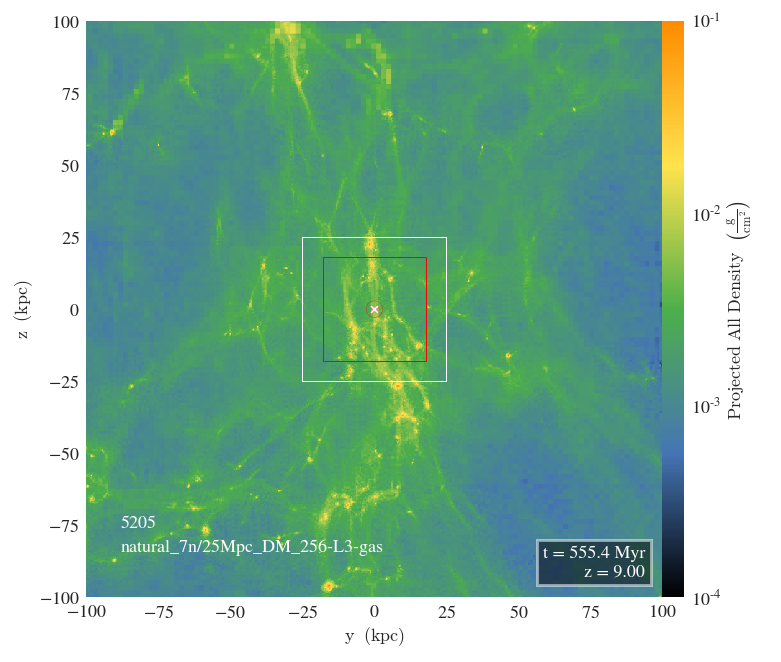

In [48]:
ds = ds_hz # ds_cr.ds #
box = get_box(ds, proj, center, width)
field = ('deposit', 'all_density') # 'density'
zlim = [1e-4, 1e-1] # [1e-5, 5e-2]
p = yt.ProjectionPlot(ds, proj, field, center=center, width=(width, 'kpc'), data_source=box)

p.annotate_text((0.06, 0.12), halo, coord_system='axis')
p.annotate_text((0.06, 0.08), run + '/25Mpc_DM_256-L3-gas', coord_system='axis')
p.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)

#p.annotate_grids(min_level=6)
p.annotate_marker(center_guess, coord_system='data', plot_args={'color':'r'})
p.annotate_sphere(center_guess, radius=(radius, 'kpc'), circle_args={'color': 'r'})
p.annotate_marker(center, coord_system='data', plot_args={'color':'w'})

p = annotate_box(p, 50, ds, unit='kpc', projection=proj, center=center, linewidth=1, color='white') # 50 physical kpc
p = annotate_box(p, 250 / (1 + ds.current_redshift) / ds.hubble_constant, ds, unit='kpc', projection=proj, center=center, linewidth=1, color='red') # 400 comoving kpc

p.set_cmap(field, density_color_map)
p.set_zlim(field, zmin=zlim[0], zmax=zlim[1])

print('\nsearch radius (red circle) =', np.round(radius, decimals=3), 'kpc physical', \
      '\nguess center at (red cross) =', center_guess, \
      '\nfound center at (white cross) =', np.array(center).round(decimals=6).tolist(), \
      '\n50 physical kpc box (red square)', \
      '\n250 comoving kpc (' + str(np.round((250 / (1 + ds.current_redshift) / ds.hubble_constant), decimals=3)) + ' physical kpc) box (white square)', \
     )
p.show()

Extracting box within left and right edges as [0.49524079 0.         0.        ] [0.55084075 1.         1.        ]


yt : [INFO     ] 2022-04-29 16:57:17,478 Projection completed
yt : [INFO     ] 2022-04-29 16:57:17,479 xlim = 0.475893 0.531493
yt : [INFO     ] 2022-04-29 16:57:17,480 ylim = 0.489565 0.545164
yt : [INFO     ] 2022-04-29 16:57:17,481 xlim = 0.475893 0.531493
yt : [INFO     ] 2022-04-29 16:57:17,481 ylim = 0.489565 0.545164
yt : [INFO     ] 2022-04-29 16:57:17,482 Making a fixed resolution buffer of (('deposit', 'all_density')) 800 by 800



search radius (red circle) = 2.878 kpc physical 
guess center at (red cross) = [0.523041, 0.503693, 0.517365] 
found center at (white cross) = [0.523041, 0.503693, 0.517365] 
50 physical kpc box (red square) 
250 comoving kpc (35.971 physical kpc) box (white square)



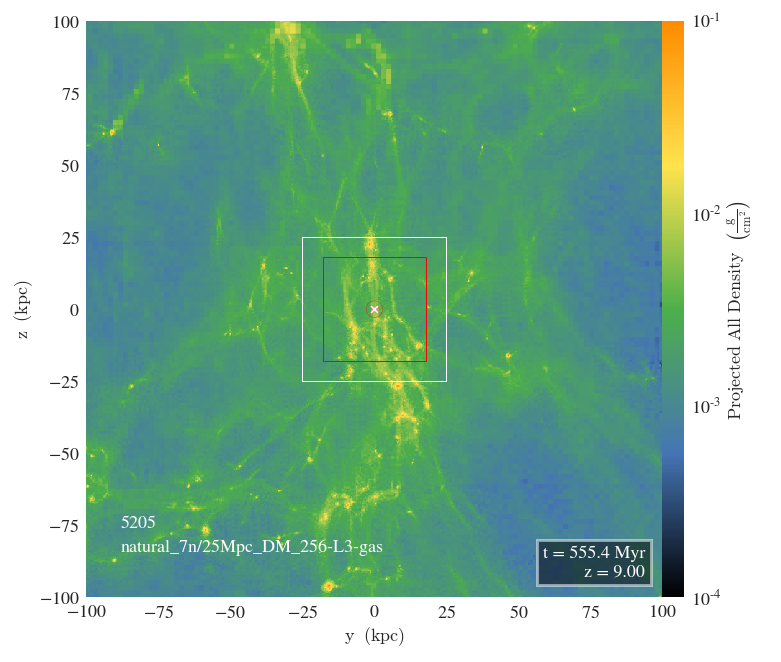

In [49]:
ds = ds_cr.ds # ds_hz # 
box = get_box(ds, proj, center, width)
field = ('deposit', 'all_density') # 'density'
zlim = [1e-4, 1e-1] # [1e-5, 5e-2]
p = yt.ProjectionPlot(ds, proj, field, center=center, width=(width, 'kpc'), data_source=box)

p.annotate_text((0.06, 0.12), halo, coord_system='axis')
p.annotate_text((0.06, 0.08), run + '/25Mpc_DM_256-L3-gas', coord_system='axis')
p.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)

#p.annotate_grids(min_level=6)
p.annotate_marker(center_guess, coord_system='data', plot_args={'color':'r'})
p.annotate_sphere(center_guess, radius=(radius, 'kpc'), circle_args={'color': 'r'})
p.annotate_marker(center, coord_system='data', plot_args={'color':'w'})

p = annotate_box(p, 50, ds, unit='kpc', projection=proj, center=center, linewidth=1, color='white') # 50 physical kpc
p = annotate_box(p, 250 / (1 + ds.current_redshift) / ds.hubble_constant, ds, unit='kpc', projection=proj, center=center, linewidth=1, color='red') # 400 comoving kpc

p.set_cmap(field, density_color_map)
p.set_zlim(field, zmin=zlim[0], zmax=zlim[1])

print('\nsearch radius (red circle) =', np.round(radius, decimals=3), 'kpc physical', \
      '\nguess center at (red cross) =', center_guess, \
      '\nfound center at (white cross) =', np.array(center).round(decimals=6).tolist(), \
      '\n50 physical kpc box (red square)', \
      '\n250 comoving kpc (' + str(np.round((250 / (1 + ds.current_redshift) / ds.hubble_constant), decimals=3)) + ' physical kpc) box (white square)', \
     )
p.show()